# Principal Component Analysis

This notebook covers the second part of the 7th exercise of the Machine Learning course at Coursera (the first part was on K-means).

It focuss on applying the PCA dimensionality reduction in two situations: (1) a simple 2D dataset example to understand the algorithm mechanics, and (2) into a dataset of 5000 face images.

In [119]:
import numpy as np
import pandas as pd
import scipy.misc
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

## PCA implementation

In [86]:
# Function that normalizes X data
# params:
# - X: data matrix [num_samples x num_features]
# returns:
# - X_norm: normalized data matrix [num_samples x num_features]
# - X_means: means of each sample [num_samples x 1]
# - X_stds: stds of each sample [num_samples x 1]
def normalize_features(X):
    X_means = np.mean(X,axis=0);
    X_norm = X - X_means;
    X_stds  = np.std(X,axis=0);
    X_norm = X_norm / X_stds;
    
    return X_norm, X_means, X_stds

In [87]:
# Function that runs all the steps of the PCA algorithm
# params:
# - X_norm: normalized data matrix [num_samples x num_features]
# - k: number of reduced dimensions (scalar)
# returns:
# - U,S,V: resulting matrices of the SVD computation
def pca(X_norm, k):
    
    # Compute the covariance matrix
    X_norm = np.matrix(X_norm);
    cov = (X_norm.T * X_norm) / X_norm.shape[0];
    
    # perform SVD
    U, S, V = np.linalg.svd(cov);
    
    return U, S, V

In [83]:
# Function that applies the reuslt of the PCS and reduces dimension
# params:
# - X_norm: normalized data matrix [num_samples x num_features]
# - U: U matrix with eigenvectors
# - k: number of reduced dimensions (scalar)
# returns:
# - Z: projected data [num_samples x k]
def dimension_reduction(X_norm, U, k):

    # 4- Pick the first k vectors of U
    U_reduced = U[:,:k];
    
    # 5- Project original data into reduced dimension space
    Z = np.dot(X_norm, U_reduced);
    
    return Z

In [84]:
# Function that reconstucts data from reduced space to original space
# params:
# - Z: projected data [num_samples x k]
# - U: U matrix with eigenvectors
# - k: number of reduced dimensions (scalar)
# returns:
# - X_reduced: reduced data matrix [num_samples x num_features]
def reconstruct_data(Z, U, k):
    
    # 4- Pick the first k vectors of U
    U_reduced = U[:,:k];
    
    # Re-project to original space
    X_reduced = np.dot(Z, U_reduced.T);
    
    return X_reduced

## PCA in a simple 2D dataset

In [72]:
# Load data
X = loadmat('ex7data1.mat')['X']
X.shape

(50, 2)

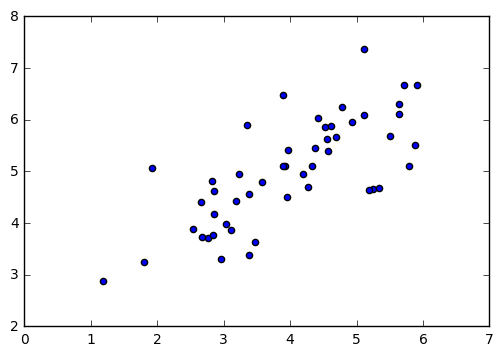

In [73]:
# explore data
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X[:,0], X[:,1])

PCA is an algorithm that finds the principal components or directions of greatest variance in a data set.
Then it applies a linear transformation projecting data onto a lower dimension space conformed of those principal components.

In this data set, there is one clear direction with large variation (vector [1,1]), and this is where the data will be projected.

In [88]:
# REDUCE DIMENSION (2D => 1D)
k=1;

# normalize X
X_norm, X_means, X_stds = normalize_features(X);

# run pca
U, S, V, = pca(X_norm, k);

# reduce dimension (project)
Z = dimension_reduction(X_norm,U,k);

# reconstruct to original space
X_reduced = reconstruct_data(Z,U,k);

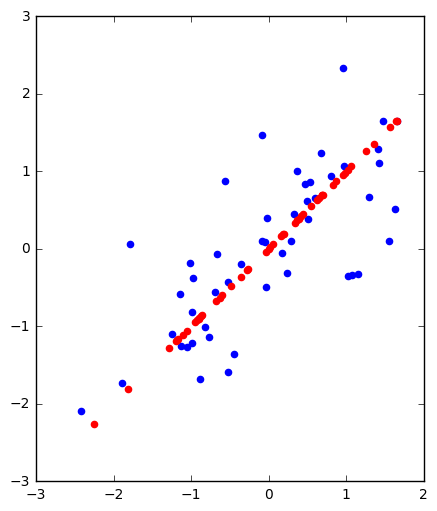

In [91]:
# check the projection: compare original data (normalized) and reduced data
fig, ax = plt.subplots(figsize=(5,6)) # figure size to make both dimensions the same size and projections look orthogonal
ax.scatter(X_norm[:,0], X_norm[:,1], color='b');
ax.scatter(X_reduced[:,0], X_reduced[:,1],color='r')

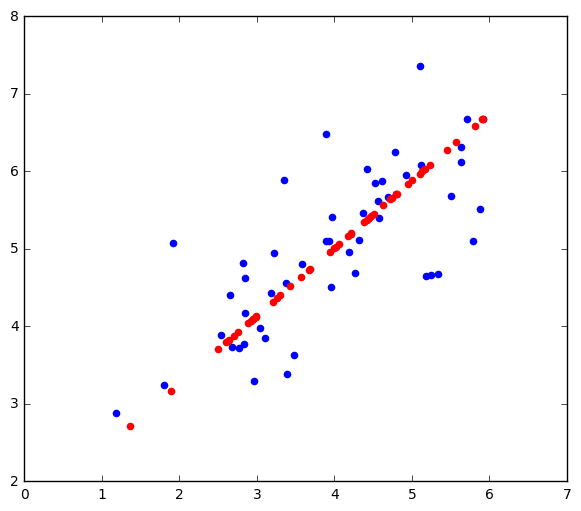

In [101]:
# check projection in the not normalized space
X_recovered = np.multiply(X_reduced, X_stds) + X_means # denormalize
fig, ax = plt.subplots(figsize=(7,6)) # figure size to make both dimensions the same size and projections look orthogonal
ax.scatter(X[:,0], X[:,1], color='b');
ax.scatter(X_recovered[:,0], X_recovered[:,1],color='r')

## PCA in face images dataset

In this second scenario we will apply PCA to reduce dimensionality of a dataset with 32x32 5000 images.
This dataset is encoded in a matrix with 5000 samples where each row is an array of 1024 values (32x32) that represent the grey-level pixel of each image.


In [125]:
# Function that displays the first nrows x ncols images into a grid
# params:
# - X: data with images [num_samples x num_pixels]
# - nrows: number of rows of the grid
# - ncols: number of cols of the grid
def show_images(X, nrows, ncols):

    # set aux variables
    img_width = 32;
    img_height = 32;
    grid_image = np.zeros((img_height*nrows,img_width*ncols))

    # loop images
    col,row = 0,0
    for image_sample in np.arange(nrows*ncols):
        
        # reshape the array into an (image) matrix
        image = X[image_sample].reshape(img_width, img_height).T
        
        # put image in grid
        grid_image[row*img_height:row*img_height+image.shape[0],col*img_width:col*img_width+image.shape[1]] = image;
        
        # manage row and column changes
        col += 1
        if col == ncols:
            row += 1
            col  = 0

    # create figure and show it
    fig = plt.figure(figsize=(nrows, ncols))
    img = scipy.misc.toimage(grid_image)
    plt.imshow(img,cmap = cm.Greys_r)

In [121]:
# Load data
X = loadmat('ex7faces.mat')['X']
X.shape

(5000, 1024)

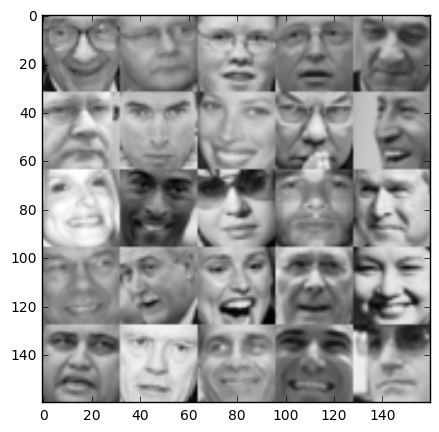

In [128]:
# Explore the first images in the dataset
show_images(X, 5, 5);

In [146]:
# REDUCE DIMENSION (1024D => 100D)
k=100;

# normalize X
X_norm, X_means, X_stds = normalize_features(X);

# run pca
U, S, V, = pca(X_norm, k);

# reduce dimension (project)
Z = dimension_reduction(X_norm,U,k);

# reconstruct to original space
X_reduced_100 = reconstruct_data(Z,U,k);

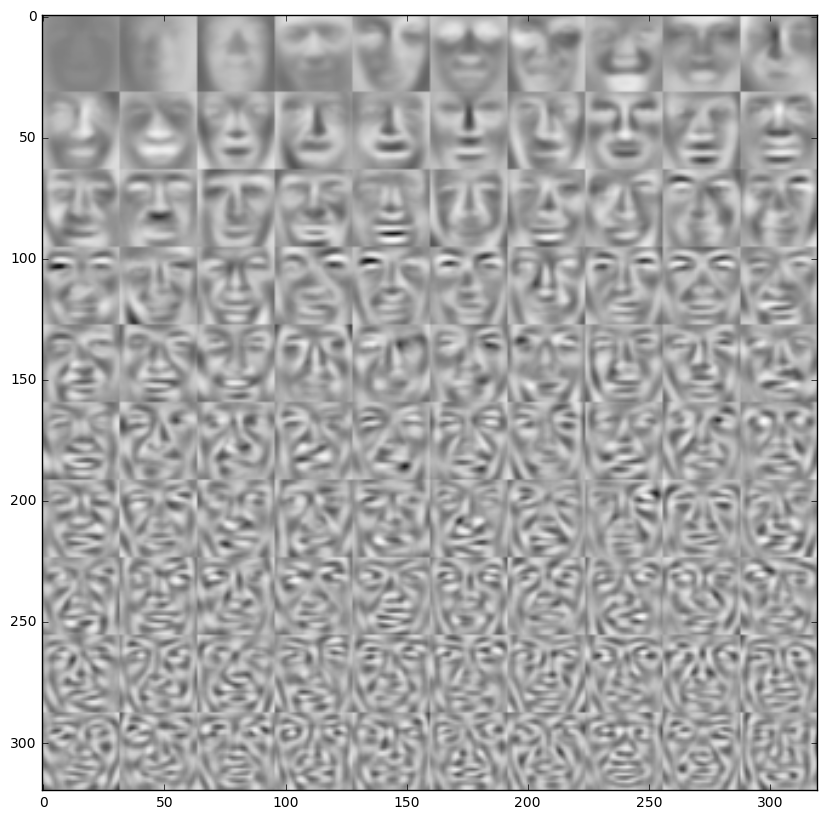

In [143]:
# Show the selected eigenvctors
show_images(U[:,:k].T, 10, 10);

We must understand the images above as the those dimensions where we will project the original data. Let's see them as 36 patterns that we will use to re-encode out original images.

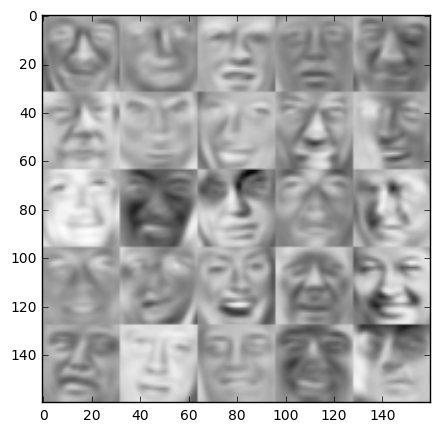

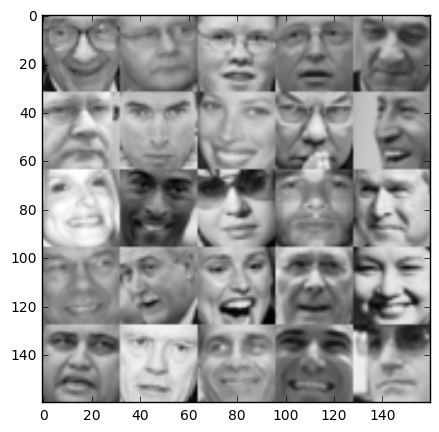

In [147]:
# Show the images with reduced dimensionality
show_images(X_reduced_100, 5, 5);
show_images(X, 5, 5);

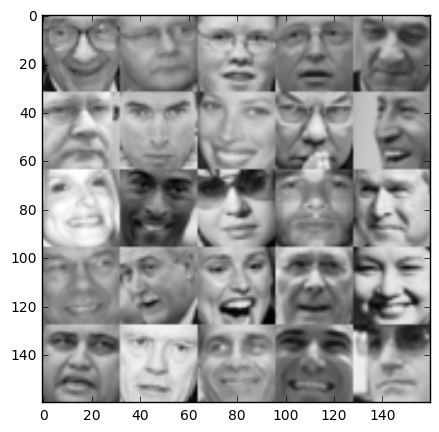

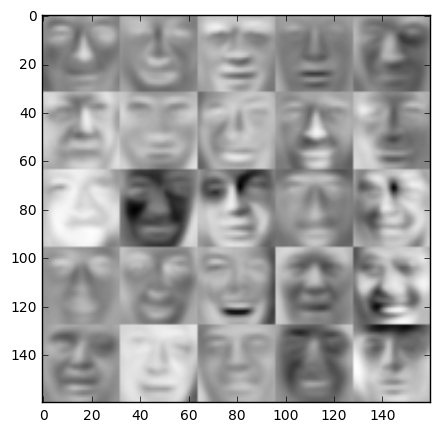

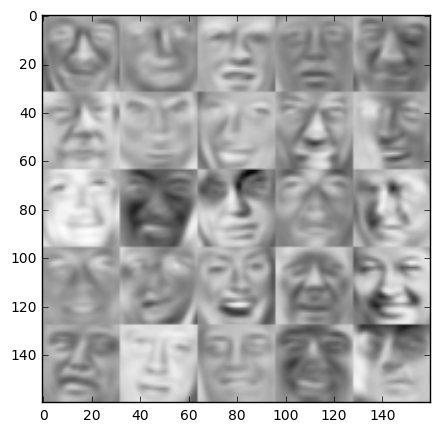

In [148]:
# REDUCE DIMENSION (1024D => 36D)
k=36;

# normalize X
X_norm, X_means, X_stds = normalize_features(X);

# run pca
U, S, V, = pca(X_norm, k);

# reduce dimension (project)
Z = dimension_reduction(X_norm,U,k);

# reconstruct to original space
X_reduced_36 = reconstruct_data(Z,U,k);

# Show the images with reduced dimensionality (comparing 36D and previous 100D)
show_images(X, 5, 5);
show_images(X_reduced_36, 5, 5);
reshow_images(X_reduced_100, 5, 5);

## How to decide K?

We can automatically choose the right value of K (smallest one that retains as much variance as possible) looking at the S matrix. Just keep adding elements in the diagonal until (sum of k)/(sum of n) adds up to the percentage of variance that we want to retain (e.g. 0.99 for 99%).

In [166]:
# Function that returns the smallest value of K that retains as much variance as possible
# params:
# - S: S array (S is a diagonal matrix)
# - retained_variance: amount of variance to retain (e.g. 0.99 for 99%)
def choose_K(S, retained_variance):
    
    # loop the elements and add them up until they reach the amount of variance to retain
    k=1;
    for s in S:
        if(S[:k].sum()/S.sum() >= retained_variance):
            return k
        k = k+1;
    return k    

In [171]:
# Compute the minimum vlue of k to retain 90% of variance for the faces scenario
choose_K(S, 0.9)

69

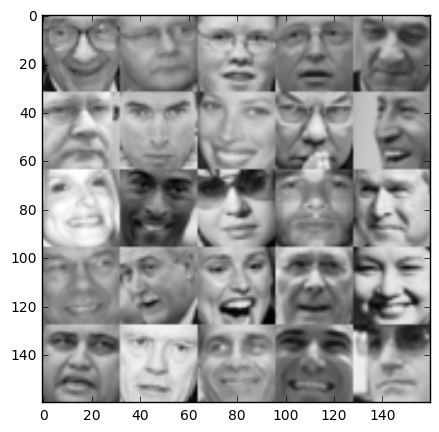

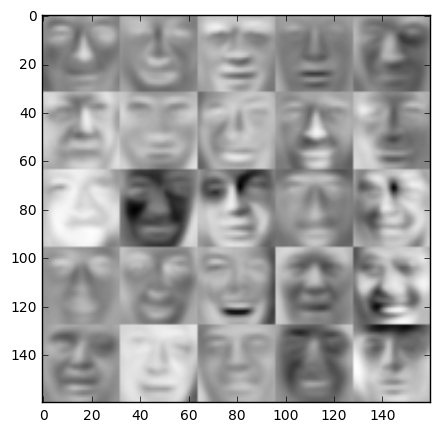

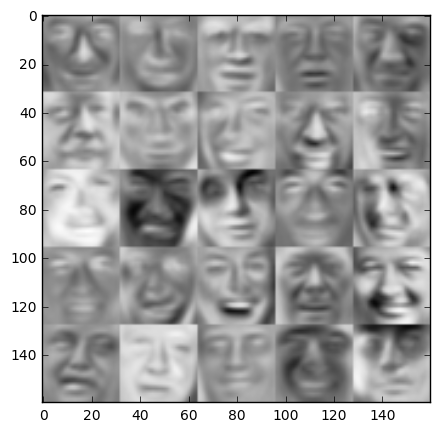

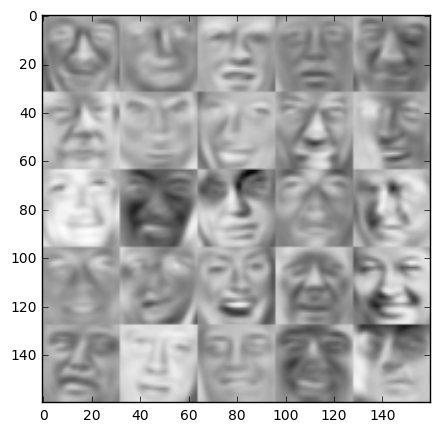

In [173]:
# REDUCE DIMENSION (1024D => 69D)
k=69;

# normalize X
X_norm, X_means, X_stds = normalize_features(X);

# run pca
U, S, V, = pca(X_norm, k);

# reduce dimension (project)
Z = dimension_reduction(X_norm,U,k);

# reconstruct to original space
X_reduced_69 = reconstruct_data(Z,U,k);

# Show the images with reduced dimensionality (comparing 36D and previous 100D)
show_images(X, 5, 5);
show_images(X_reduced_36, 5, 5);
show_images(X_reduced_69, 5, 5);
show_images(X_reduced_100, 5, 5);

Honestly, quite difficult to decide at least visually... But with 69 dimensions we retain 90% of variance!